In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

In [9]:
import os

In [10]:
os.getcwd()

'/home/schmidh'

In [12]:
image_as_array = mpimg.imread("cow.jpg")

In [14]:
image_as_array.shape

(3456, 5184, 3)

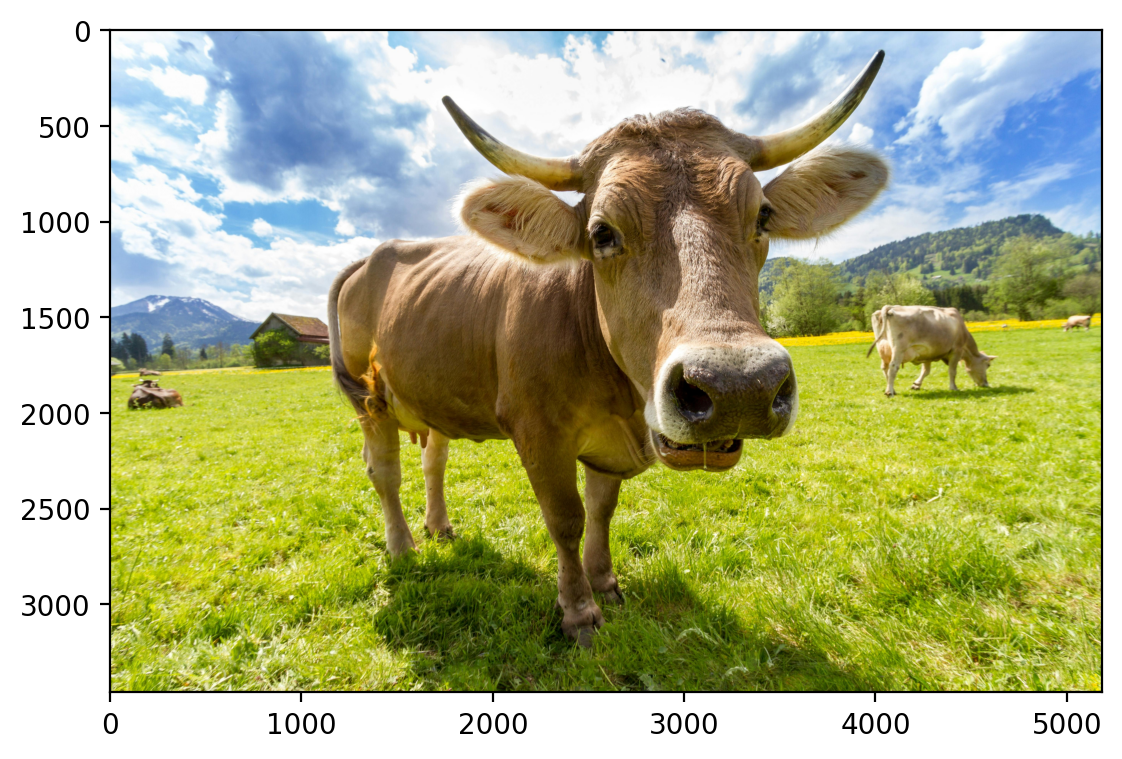

In [17]:
plt.figure(dpi=200)
plt.imshow(image_as_array)

In [18]:
(h,w,c) = image_as_array.shape

In [19]:
h

3456

In [20]:
w

5184

In [21]:
c

3

In [22]:
image_as_array2d = image_as_array.reshape(h*w, c)

In [23]:
image_as_array2d

array([[253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       ...,
       [141, 154,  14],
       [133, 147,  10],
       [118, 132,   0]], shape=(17915904, 3), dtype=uint8)

In [24]:
image_as_array2d.shape

(17915904, 3)

In [25]:
model = KMeans(n_clusters=6)

In [28]:
labels = model.fit_predict(image_as_array2d)

In [29]:
labels

array([2, 2, 2, ..., 5, 5, 1], shape=(17915904,), dtype=int32)

In [30]:
model.cluster_centers_

array([[199.96308971, 200.59356493,  95.35606514],
       [123.53496566, 114.27794479,  58.68431802],
       [228.75621326, 235.87497157, 238.7602521 ],
       [137.99730946, 176.05915972, 220.2923741 ],
       [ 72.71734462,  66.53697448,  12.66572952],
       [169.21299577, 181.93220238,  23.10328312]])

In [47]:
rgb_codes = model.cluster_centers_.round(0).astype("uint8")

In [48]:
rgb_codes

array([[200, 201,  95],
       [124, 114,  59],
       [229, 236, 239],
       [138, 176, 220],
       [ 73,  67,  13],
       [169, 182,  23]], dtype=uint8)

In [49]:
rgb_codes[labels]

array([[229, 236, 239],
       [229, 236, 239],
       [229, 236, 239],
       ...,
       [169, 182,  23],
       [169, 182,  23],
       [124, 114,  59]], shape=(17915904, 3), dtype=uint8)

In [50]:
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))

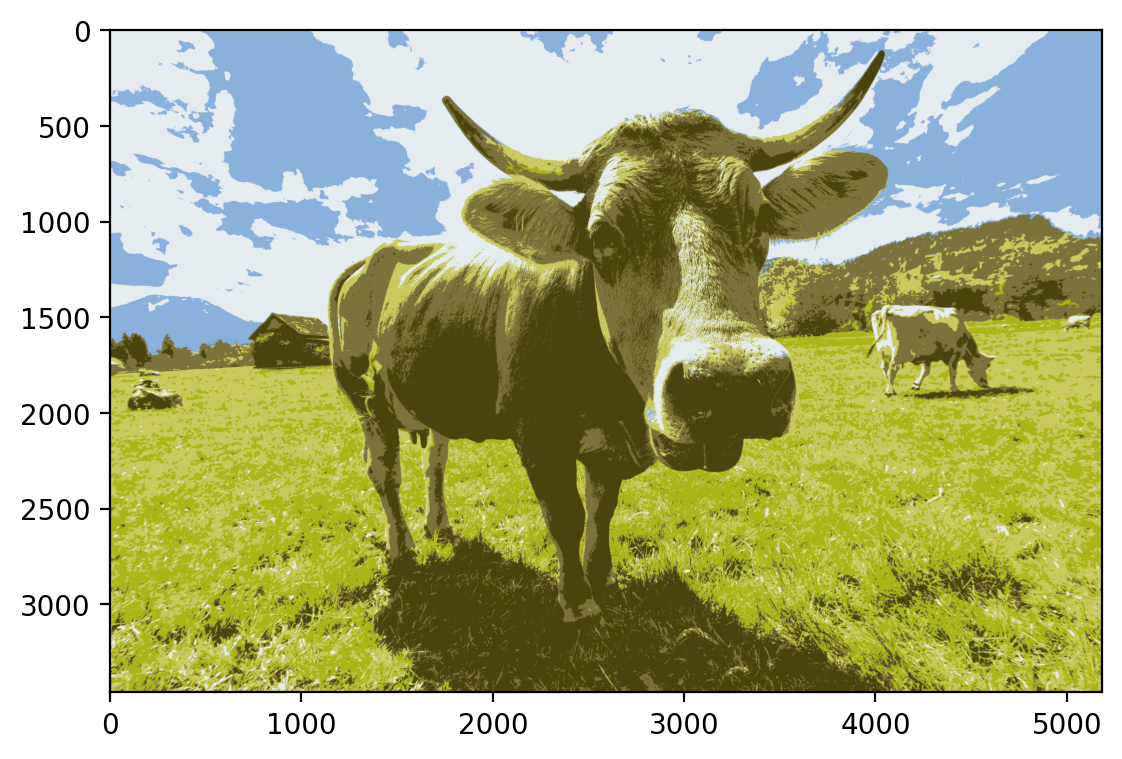

In [51]:
plt.figure(dpi=200)
plt.imshow(quantized_image)

In [52]:
type(quantized_image)

numpy.ndarray

In [53]:
mpimg.imsave("cow_quantized.jpg", quantized_image)